In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA


'Crowdfunding is the practice of funding a project or venture by raising small amounts of money from a large number of people, typically via the Internet.'[1] I was interested in launching my own kickstarter project a couple of years ago but I managed to find another way of funding my idea. However, my interested in the crowdfunding practice remained and I wanted to see if my project would have been successful if I released in the first place. So, I was trying to find data based on different projects and their successsful rate and characteristics and I managed to find such data in the website called Kaggle.

In [48]:
df1 = pd.read_csv('ks-projects-201801.csv')
df1.head(10)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00


Exploring the variables

In [49]:
#Creating a new column including the launched date but without the timestamp so it can be easily compared to the deadline date
df1['Launched_updated'] = df1['launched'].str[0:11]
df1['year_month'] =  df1['Launched_updated'].str[:7]


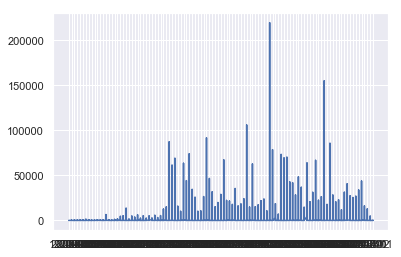

In [50]:
result2 = df1.sort_values('year_month', ascending=True).reset_index()
plt.plot(result2['year_month'], result2['backers'])
plt.show()

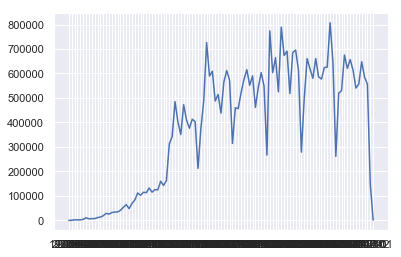

In [51]:
result = df1.groupby('year_month', as_index=False).sum()
plt.plot(result['year_month'], result['backers'])
plt.show()

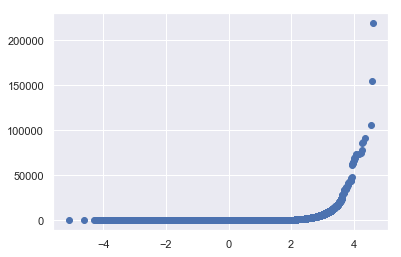

In [53]:
norm= np.random.normal(0, 1, 378661)
norm.sort()
plt.plot(norm, df1['backers'].sort_values(), "o") 
plt.show() 

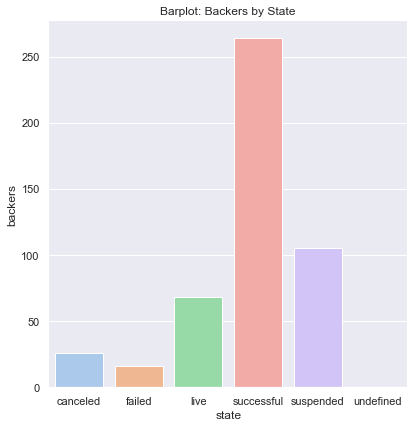

In [54]:
s_sum = df1.groupby('state', as_index=False).mean()
#print(s_sum)

sns.set(style="darkgrid")

g = sns.factorplot(x="state", y="backers", data=s_sum,
                   size=6, kind="bar", palette="pastel", ci=95)
g.despine(left=True)
g.set_ylabels("backers")
g.set_xlabels("state")
plt.title('Barplot: Backers by State')
plt.show()

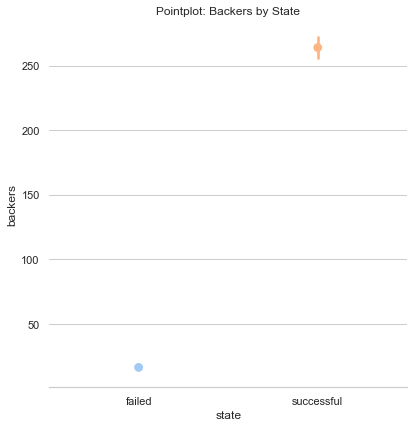

In [62]:
sns.set(style="whitegrid")

g = sns.factorplot(x="state", y="backers", data=df1,
                   size=6, kind="point", palette="pastel",ci=95,dodge=True,join=False)
g.despine(left=True)
g.set_ylabels("backers")
g.set_xlabels("state")
plt.title('Pointplot: Backers by State')
plt.show()

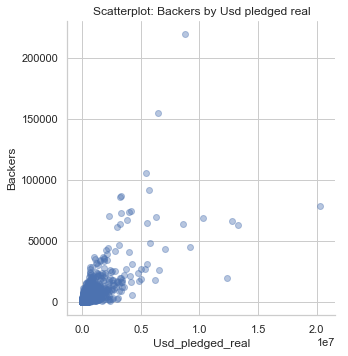

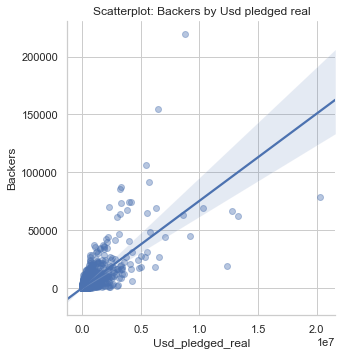

In [63]:
g = sns.lmplot(y='backers', # Variable 1.
               x='usd_pledged_real', # Variable 2.
               data=df1, # Data
               fit_reg=False, # If set to true, plots a regression line.
               scatter_kws={'alpha':0.4}) # Set points to semi-transparent to see overlaping points.
g.set_ylabels("Backers")
g.set_xlabels("Usd_pledged_real")
plt.title('Scatterplot: Backers by Usd pledged real')
plt.show()

g = sns.lmplot(y='backers', # Variable 1.
               x='usd_pledged_real', # Variable 2.
               data=df1, # Data
               fit_reg=True, # If set to true, plots a regression line.
               scatter_kws={'alpha':0.4}) # Set points to semi-transparent to see overlaping points.
g.set_ylabels("Backers")
g.set_xlabels("Usd_pledged_real")
plt.title('Scatterplot: Backers by Usd pledged real')
plt.show()

In [ ]:
sns.set(style="whitegrid")
ax = sns.boxplot(x='usd_pledged_real',y='backers',data=df1,palette='pastel')  
plt.title('Plot 4: Backers by Pledged funds')
sns.despine(offset=10, trim=True)
ax.set(xlabel='', ylabel='backers')
plt.show()

Feature engineering

In [55]:
# Creating a new column consisting of the calculated difference in days between the launched date and the deadline date so we can draw 
# some conclusions based on that difference. 
df1['deadline'] = pd.to_datetime(df1['deadline'])
df1['Launched_updated'] = pd.to_datetime(df1['Launched_updated'])
df1['Date_difference'] = df1['deadline'] - df1['Launched_updated']

In [56]:
df1 = df1.dropna()

In [57]:
df1 = df1[df1["state"].isin(["failed", "successful"])]

In [58]:
df1["launched_month"]   = df1["Launched_updated"].dt.month
df1["launched_week"]    = df1["Launched_updated"].dt.week
df1["launched_day"]     = df1["Launched_updated"].dt.weekday

In [59]:
df1["is_weekend"] = df1["launched_day"].apply(lambda x: 1 if x > 4 else 0)

In [60]:
df1["num_words"]        = df1["name"].apply(lambda x: len(x.split()))

In [61]:
df1["num_chars"]        = df1["name"].apply(lambda x: len(x.replace(" ","")))